## WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import scipy.stats as st
import requests
import time
from scipy.stats import linregress

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Import the OpenWeatherMap API key
from api_keys import OPENWEATHER_KEY

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


In [24]:
# Set the API base URL
BASE_URL = f"http://api.openweathermap.org/data/2.5/weather?units=metric&appid={OPENWEATHER_KEY}" 

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{BASE_URL}&q={city.replace(' ', '+')}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = (requests.get(city_url)).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather['coord']['lon']
        city_temp_max = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_temp_max,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto natales
Processing Record 2 of Set 1 | qamdo
Processing Record 3 of Set 1 | nar'yan-mar
Processing Record 4 of Set 1 | cadale
Processing Record 5 of Set 1 | alofi
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | georgetown
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | campo grande
Processing Record 11 of Set 1 | margaret river
Processing Record 12 of Set 1 | enewetak
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | hasaki
Processing Record 15 of Set 1 | tiksi
Processing Record 16 of Set 1 | flying fish cove
Processing Record 17 of Set 1 | edinburgh of the seven seas
Processing Record 18 of Set 1 | broceni
Processing Record 19 of Set 1 | vila velha
Processing Record 20 of Set 1 | baise city
Processing Record 21 of Set 1 | whitehorse
Processing Record 22 of Set 1 | inverca

In [25]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [26]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-51.7236,-72.4875,1.31,88,32,2.51,CL,1686962547
1,qamdo,31.1667,97.2333,7.81,62,100,1.47,CN,1686962547
2,nar'yan-mar,67.6713,53.0870,3.08,80,100,6.26,RU,1686962548
3,cadale,2.7603,46.3222,25.74,81,13,8.94,SO,1686962548
4,alofi,-19.0595,-169.9187,21.94,94,100,4.63,NU,1686962548


In [27]:
# Export the City_Data into a csv
city_data_df.to_csv("Cities.csv")

In [28]:
# Read saved data
city_data_df = pd.read_csv("Cities.csv")

# Display sample data
city_data_df.head()

,Unnamed: 0,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,puerto natales,-51.7236,-72.4875,1.31,88,32,2.51,CL,1686962547
1,1,qamdo,31.1667,97.2333,7.81,62,100,1.47,CN,1686962547
2,2,nar'yan-mar,67.6713,53.0870,3.08,80,100,6.26,RU,1686962548
3,3,cadale,2.7603,46.3222,25.74,81,13,8.94,SO,1686962548
4,4,alofi,-19.0595,-169.9187,21.94,94,100,4.63,NU,1686962548


## Create the Scatter Plots Requested 

### Latitude Vs. Temperature

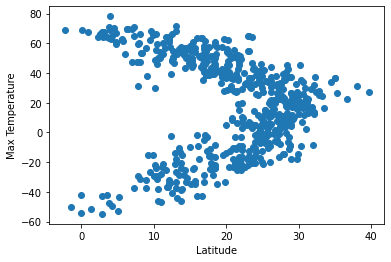

In [29]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Max Temp"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

# Show plot
plt.show()

### Latitude Vs. Humidity 

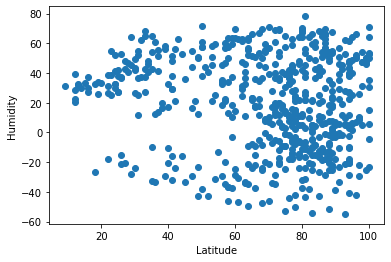

In [30]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Humidity"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Show plot
plt.show()

### Latitude Vs. Cloudiness

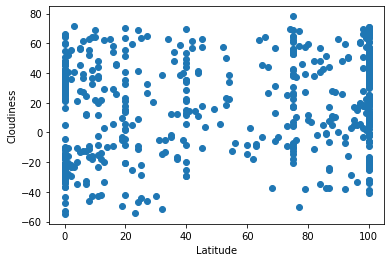

In [31]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Cloudiness"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Show plot
plt.show()

### Latitude Vs. Wind Speed Plot

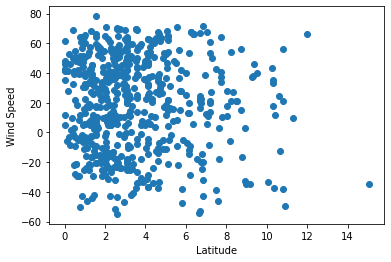

In [32]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Wind Speed"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Show plot
plt.show()

## Requirment 2: Compute Linear Regression for Each Relationship

In [33]:
# Define a function to create Linear Regression plots
def linear_regress(x, y, eqn_coordinates):
    r = st.pearsonr(x, y)
    print(f"The r-value is: {r[0]}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y ={slope: .2f}x +{intercept: .2f}"
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, eqn_coordinates, fontsize=12, color="red")
    plt.scatter(x, y)
    plt.xlabel(f"{x.name}")
    plt.ylabel(f"{y.name}")

In [34]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,Unnamed: 0,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,1,qamdo,31.1667,97.2333,7.81,62,100,1.47,CN,1686962547
2,2,nar'yan-mar,67.6713,53.0870,3.08,80,100,6.26,RU,1686962548
3,3,cadale,2.7603,46.3222,25.74,81,13,8.94,SO,1686962548
5,5,albany,42.6001,-73.9662,16.76,92,100,1.26,US,1686962548
6,6,georgetown,5.4112,100.3354,27.96,100,20,1.03,MY,1686962548


In [35]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,Unnamed: 0,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,puerto natales,-51.7236,-72.4875,1.31,88,32,2.51,CL,1686962547
4,4,alofi,-19.0595,-169.9187,21.94,94,100,4.63,NU,1686962548
7,7,adamstown,-25.0660,-130.1015,21.51,68,100,3.26,PN,1686962549
8,8,grytviken,-54.2811,-36.5092,-0.01,83,23,6.65,GS,1686962549
9,9,campo grande,-20.4428,-54.6464,13.75,82,75,3.09,BR,1686962548


### Temperature Vs. Latitude Linear Rgression Plot

The r-value is: -0.7611428057906036


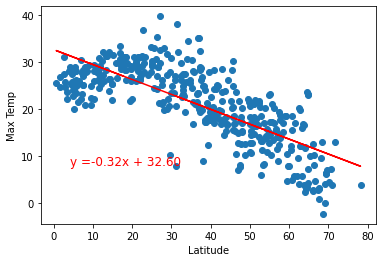

In [36]:
# Linear regression on Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Max Temp"], (4, 8))

The r-value is: 0.7624533684358409


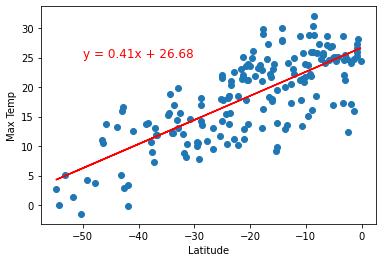

In [37]:
# Linear regression on Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Max Temp"], (-50, 25))

### Discussion about the linear relationship: 

#### - There is a negative correlation between "Latitude" and "Max Temperature" on the Northern Hemisphere.
#### - There is a positve correlation between "Latitude" and "Max Temperature"  on the Southern Hemisphere.

### Humidity Vs. Latitude Linear Regression Plot

The r-value is: -0.09562109012278587


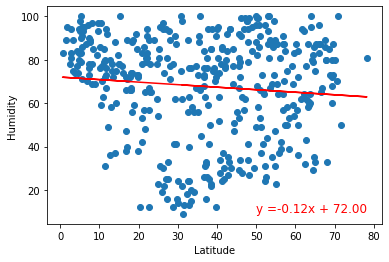

In [38]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Humidity"], (50, 10))

The r-value is: 0.20262745932191156


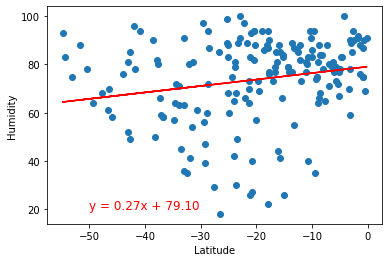

In [39]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Humidity"], (-50, 20))

### Discussion about the linear relationship: 

### Cloudiness Vs. Latitude Linear Regression Plot 

#### - There is a negative correlation between "Latitude" and "Humidity" on the Northern Hemisphere.
#### - There is a positive correlation between "Latitude" and "Humidity" on the Southern Hemisphere.

The r-value is: -0.025853778509679633


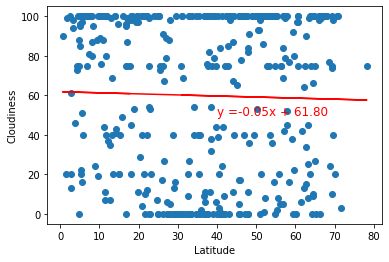

In [40]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Cloudiness"], (40, 50))

The r-value is: 0.24104367971874613


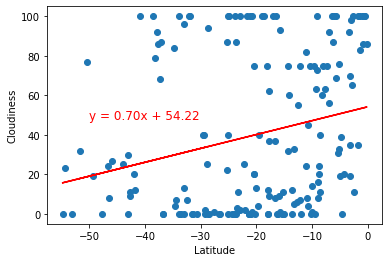

In [41]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Cloudiness"], (-50, 48))

### Discussion about the linear relationship:

####  - There is a negative correlation between "Latitude" and "Cloudiness" on the Northern Hemisphere.
#### - There is a positive correlation between "Latitude" and "Cloudiness" on the Southern Hemisphere.

### Wind Speed Vs. Latitude Linear Regression Plot 

The r-value is: -0.033034625701605876


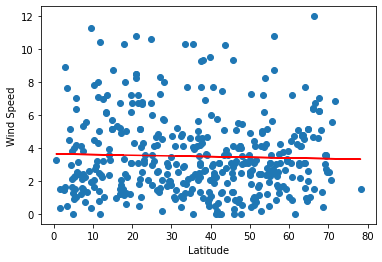

In [42]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Wind Speed"], (10, 14))

The r-value is: -0.26291642799063397


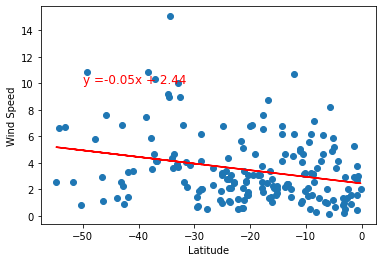

In [43]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Wind Speed"], (-50, 10))

### Discussion about the linear relationship: 

#### -  There is a negative correlation between "Latitude" and "Wind Speed" on the Northern Hemisphere.
#### - There is a negative correlation between "Latitude" and "Wind Speed" on the Southern Hemisphere.